#  SOLVING CALCULUS PROBLEMS
## Derivatives and Integrals

#  Programming Challenges

The following challenges build on what you’ve learned in this notebook. You can find solutions in the Solutions notebook.

## #2: Implement the Gradient Descent

The gradient descent method is used to find the minimum value of a function. Similar to the gradient ascent method, the gradient descent method is an iterative method: we start with an initial value of the variable and gradually get closer to the variable value that corresponds to the minimum value of the function. The step that gets us closer is the equation

$$x_{new} = x_{old} - \lambda \frac{df}{dx}$$

where $\lambda$ is the step size and

$$\frac{df}{dx}$$

is the result of differentiating the function. Thus, the only difference from the gradient ascent method is how we obtain the value of `x_new` from `x_old`. 

Your challenge is to implement a generic program using the gradient descent algorithm to find the minimum value of a single-variable function specified as input by the user. The program should also create a graph of the function and show all the intermediate values it found before finding the minimum.

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gradient_descent(func, var, initial_value, lamb = 10e-3, eps = 10e-6):

    x = sympy.Symbol('x')
    df = sympy.Derivative(f, x).doit()

    xold = initial_value
    xnew = xold - lamb*df.subs({x:xold})
    steps = [xold]

    while abs(xold - xnew) > eps:
        steps.append(xnew)
        xold = xnew
        xnew = xold - lamb*df.subs({x:xold})

    return xnew, steps

In [5]:
f = 'x**2'
sol, steps = gradient_descent(f, 'x', 2)

In [6]:
print(sol)
print(steps[0:3])
print(steps[-1])

0.000485482054297453
[2, 1.96000000000000, 1.92080000000000]
0.000495389851323931


In [68]:
def find_min():
    func = input('Function: ')
    var = input('Variable: ')
    initial_value = float(input('Initial value: '))
    sol, steps = gradient_descent(func, var, initial_value)
    print('The minimum is {}'.format(sol))
    
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes()
    ax.plot(t, [sympy.sympify(func).subs({x:p}).evalf() for p in t])
    ax.plot(steps, [sympy.sympify(func).subs({x:p}).evalf() for p in steps], 'ro', alpha=.5, markerfacecolor='None')
    ax.axes.set_xlim(float(np.min(steps))-0.2, float(np.max(steps))+0.2)

Function: x**2
Variable: x
Initial value: 2
The minimum is 0.000485482054297453


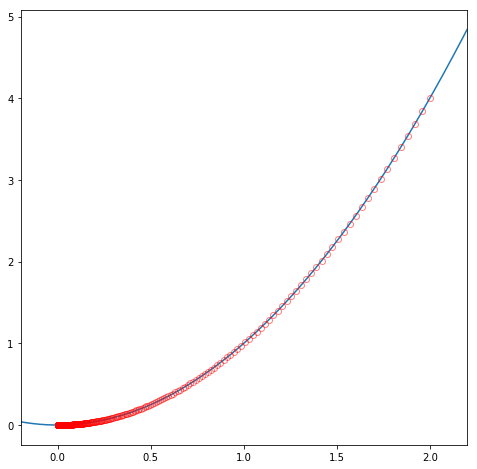

In [69]:
find_min()

## #3: Area Between Two Curves

We learned that the integral

$$\int_{a}^{b} f(x) dx$$

expresses the area enclosed by the function $f(x)$, with the x-axis between $x = a$ and $x = b$. The area between two curves is thus expressed as the integral

$$\int_{a}^{b} (f(x)-g(x)) dx$$

where $a$ and $b$ are the points of intersection of the two curves with $a < b$. The function $f(x)$ is referred to as the *upper function* and $g(x)$ as the *lower function*. Figure 1-9 illustrates this, assuming $f(x) = x$ and $g(x) = x^2$, with a = 0 and b = 1.

Your challenge here is to write a program that will allow the user to input any two single-variable functions of $x$ and print the enclosed area between the two. The program should make it clear that the first function entered should be the upper function, and it should also ask for the values of $x$ between which to find the area.

<img src='fig7-9.png' style='width:450px' />

*Figure 1-9: The functions f(x) = x and g(x) = x2 enclose an area between x = 0 and x = 1.0.*

In [79]:
upperf = 'x'
lowerf = 'x**2'
a = 0
b = 1

x = sympy.Symbol('x')

sympy.Integral(sympy.sympify(upperf)-sympy.sympify(lowerf), (x, a, b)).doit().evalf()

0.166666666666667

In [80]:
def area_between():
    upperf = input('Enter the upper function: ')
    lowerf = input('Enter the lower function: ')
    var = input('Enter the variable: ')
    a = input('Enter the lower bound: ')
    b = input('Enter the upper bound: ')

    x = sympy.Symbol(var)

    print('The area between the two curves is', sympy.Integral(sympy.sympify(upperf)-sympy.sympify(lowerf), (x, a, b)).doit().evalf())

In [85]:
area_between()

Enter the upper function: x
Enter the lower function: log(x)
Enter the variable: x
Enter the lower bound: 1
Enter the upper bound: 2
The area between the two curves is 1.11370563888011


## #4: Finding the Length of a Curve

Let’s say you just completed cycling along a road that looks roughly like Figure 1-10. Because you didn’t have an odometer, you want to know whether there’s a mathematical way to determine the distance you cycled. First, we’ll need to find an equation—even an approximation will do—that describes this path.

<img src='fig7-10.png' style='width:450px' />

*Figure 1-10: An approximation of the cycling path*

Notice how it looks very similar to the quadratic functions you learned about in algebra? In fact, for this challenge, let’s assume that the equation is $y=f(x)=2x^2 +3x + 1$ and that you cycled from point $A (−5, 36)$ to point $B (10, 231)$. To find the length of this arc—that is, the distance you cycled—we’ll need to calculate the integral

$$\int_{a}^{b}\sqrt{1+\left(\frac{dy}{dx}\right)^2} dx,$$

where $y$ describes the preceding function. Your challenge here is to write a program that will calculate the length of the arc, $AB$. You may also want to generalize your solution so that it allows you to find the length of the arc between any two points for any arbitrary function, $f(x)$.

In [98]:
x = sympy.Symbol('x')
f = 2*x**2 + 3*x + 1
a = -5.36
b = 10.231
g = sympy.sqrt(1 + (sympy.Derivative(f, x).doit())**2)
sympy.Integral(g, (x, a, b)).doit().evalf()

284.804385696140

In [99]:
def arc_length():
    f = input('Enter a function: ')
    var = input('Enter the variable: ')
    a = input('Enter the starting point: ')
    b = input('Enter the end point: ')
    
    x = sympy.Symbol(var)
    g = sympy.sqrt(1 + (sympy.Derivative(sympy.sympify(f), x).doit())**2)
    print('The length is', sympy.Integral(g, (x, a, b)).doit().evalf())

In [100]:
arc_length()

Enter a function: 2*x**2 + 3*x + 1
Enter the variable: x
Enter the starting point: -5.36
Enter the end point: 10.231
The length is 284.804385696140
